In [341]:
## Summary of analysis in the word file attached with email

In [210]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import numpy as np 
import pandas as pd 
from sklearn.model_selection import cross_val_score, StratifiedKFold # instead if train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, roc_auc_score
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')
%matplotlib inline
from pandas_profiling import ProfileReport
import pandas as pd
import plotly.tools as tls
import klib
import plotly.offline as py 
import plotly.graph_objs as go
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree   import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.svm import SVC

from prettytable import PrettyTable

In [342]:
#Lets take a look at the dataset

In [212]:
train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


train.info()

In [343]:
# Converting unnamed column to id

In [214]:
data = [train, test]
for df in data:
    df.rename(columns={'Unnamed: 0': 'Id'}, inplace = True)

In [215]:
train

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [216]:
df.nunique()

Id                                      101503
SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines     85716
age                                         82
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                                79878
MonthlyIncome                            11976
NumberOfOpenCreditLinesAndLoans             56
NumberOfTimes90DaysLate                     18
NumberRealEstateLoansOrLines                24
NumberOfTime60-89DaysPastDueNotWorse        12
NumberOfDependents                          13
dtype: int64

In [344]:
##SeriousDlqin2yrs Distribution

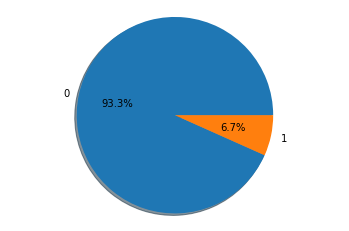

In [217]:
labels = train['SeriousDlqin2yrs'].astype('category').cat.categories.tolist()
counts = train['SeriousDlqin2yrs'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Proportion of People Who Defaulted: 0.06684


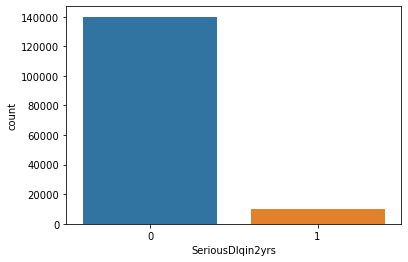

In [218]:
sns.countplot(x="SeriousDlqin2yrs", data=train)
print("Proportion of People Who Defaulted: {}".format(train["SeriousDlqin2yrs"].sum() / len(train)))

In [219]:
df["age"].describe()


count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64

C:\Users\kalpi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

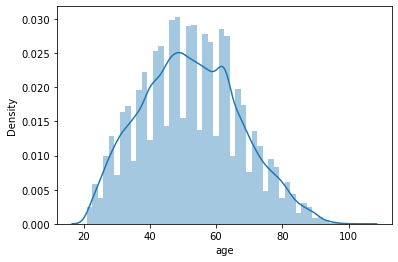

In [220]:
sns.distplot(df["age"])

C:\Users\kalpi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kalpi\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning:

Mean of empty slice.

C:\Users\kalpi\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\kalpi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning:

invalid value encountered in true_divide



<AxesSubplot:xlabel='age'>

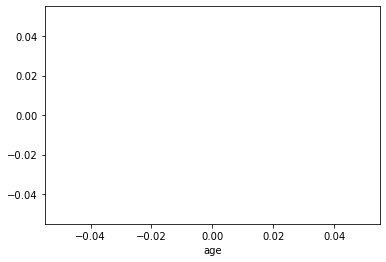

In [221]:
sns.distplot(df.loc[df["SeriousDlqin2yrs"] == 0]["age"])

C:\Users\kalpi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kalpi\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning:

Mean of empty slice.

C:\Users\kalpi\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\kalpi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning:

invalid value encountered in true_divide



<AxesSubplot:xlabel='age'>

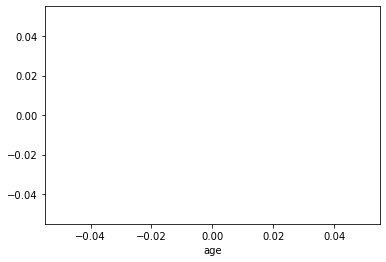

In [222]:
sns.distplot(df.loc[df["SeriousDlqin2yrs"] == 1]["age"])

In [223]:
df["DebtRatio"].describe()

count    101503.000000
mean        344.475020
std        1632.595231
min           0.000000
25%           0.173423
50%           0.364260
75%           0.851619
max      268326.000000
Name: DebtRatio, dtype: float64

In [224]:
df["DebtRatio"].quantile(0.95)

2435.0

In [225]:
df=train
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.95)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,7494.000000,379.000000,7494.000000
mean,4417.958367,0.084433,0.055111
std,7875.314649,0.278403,0.228212
min,2450.000000,0.000000,0.000000
25%,2893.250000,0.000000,0.000000
50%,3491.000000,0.000000,0.000000
75%,4620.000000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [345]:
#Here we see someone owes 329664 times of what they own ,, we wanna remove such high outliers

In [226]:
len(df[(df["DebtRatio"] > df["DebtRatio"].quantile(0.95)) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])])

331

In [227]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.95)]["MonthlyIncome"].value_counts()


0.0    347
1.0     32
Name: MonthlyIncome, dtype: int64

In [228]:
df["DebtRatio"].quantile(0.975)

3489.024999999994

In [229]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.975)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,3750.000000,185.000000,3750.000000
mean,5917.488000,0.064865,0.064267
std,10925.524011,0.246956,0.245260
min,3490.000000,0.000000,0.000000
25%,3957.250000,0.000000,0.000000
50%,4619.000000,0.000000,0.000000
75%,5789.500000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [230]:
len(df[(df["DebtRatio"] > df["DebtRatio"].quantile(0.975)) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])])

164

In [231]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.975)]["MonthlyIncome"].value_counts()

0.0    173
1.0     12
Name: MonthlyIncome, dtype: int64

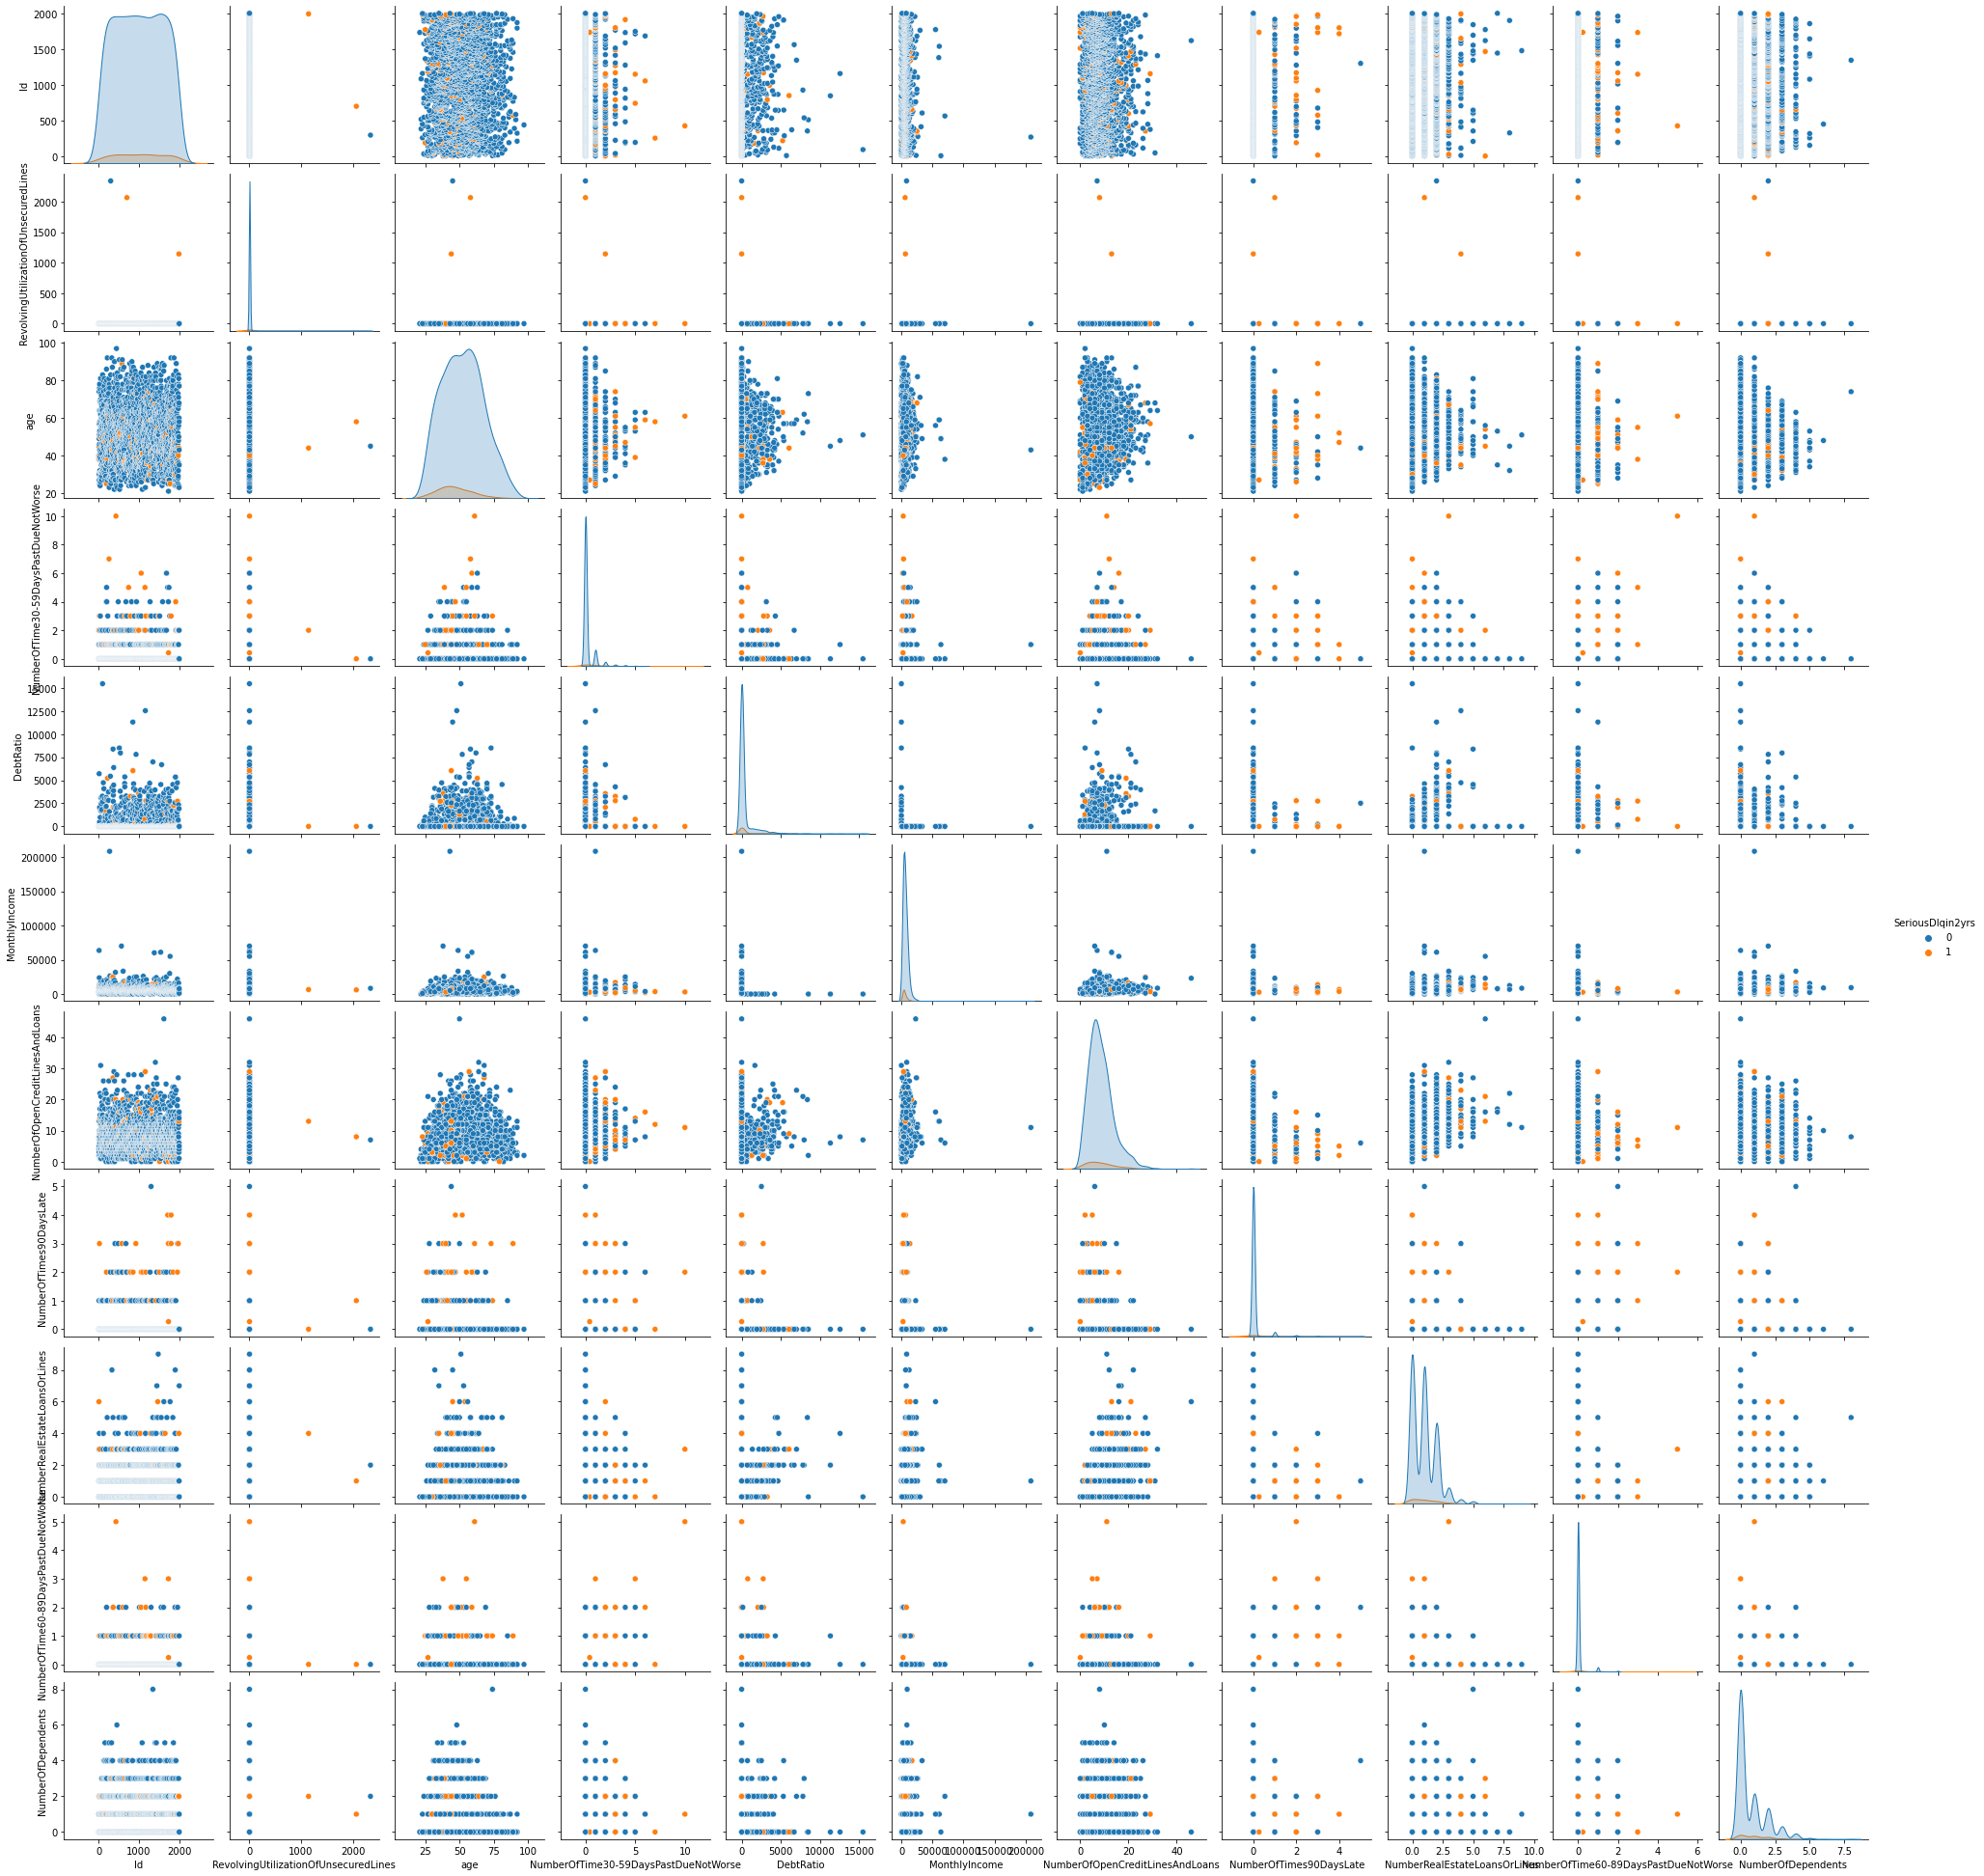

In [118]:
sns.pairplot(train.iloc[0:2000,:], hue= 'SeriousDlqin2yrs')

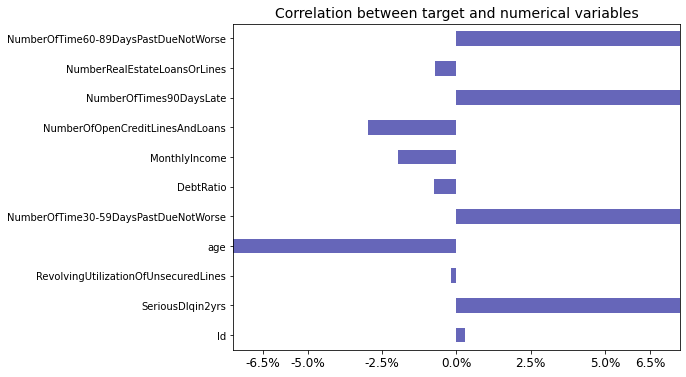

In [232]:
train.corr()['SeriousDlqin2yrs'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

In [233]:
y = train['SeriousDlqin2yrs']
X = train.drop(['Id', 'SeriousDlqin2yrs'], axis = 1)

y_test = test['SeriousDlqin2yrs']
X_test = test.drop(['Id', 'SeriousDlqin2yrs'], axis = 1)
X.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [234]:
null_val_sums = X.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(X) })

,Column,Number of Null Values,Proportion
0,RevolvingUtilizationOfUnsecuredLines,0,0.000000
1,age,0,0.000000
2,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
3,DebtRatio,0,0.000000
4,MonthlyIncome,29731,0.198207
5,NumberOfOpenCreditLinesAndLoans,0,0.000000
6,NumberOfTimes90DaysLate,0,0.000000
7,NumberRealEstateLoansOrLines,0,0.000000
8,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000
9,NumberOfDependents,3924,0.026160


In [235]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_features
num_impute = SimpleImputer(strategy = 'median')
num_scale = StandardScaler()


num_impute.fit(X[numerical_features])
num_scale.fit(X[numerical_features])

X[numerical_features] = num_impute.transform(X[numerical_features]).copy()
X_test[numerical_features] = num_impute.transform(X_test[numerical_features]).copy()

X[numerical_features] = num_scale.transform(X[numerical_features]).copy()
X_test[numerical_features] = num_scale.transform(X_test[numerical_features]).copy()

In [236]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.021150,-0.493860,0.376593,-0.172833,0.170305,0.883657,-0.063793,4.409546,-0.057852,1.114517
1,-0.020385,-0.832342,-0.100419,-0.173168,-0.282957,-0.865297,-0.063793,-0.901283,-0.057852,0.217722
2,-0.021582,-0.967735,0.138087,-0.173186,-0.252229,-1.253953,0.176056,-0.901283,-0.057852,-0.679073
3,-0.023281,-1.509307,-0.100419,-0.173210,-0.234293,-0.670969,-0.063793,-0.901283,-0.057852,-0.679073
4,-0.020585,-0.223074,0.138087,-0.173215,3.956851,-0.282312,-0.063793,-0.016145,-0.057852,-0.679073


In [237]:
null_val_sums = X.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(X) })

,Column,Number of Null Values,Proportion
0,RevolvingUtilizationOfUnsecuredLines,0,0.0
1,age,0,0.0
2,NumberOfTime30-59DaysPastDueNotWorse,0,0.0
3,DebtRatio,0,0.0
4,MonthlyIncome,0,0.0
5,NumberOfOpenCreditLinesAndLoans,0,0.0
6,NumberOfTimes90DaysLate,0,0.0
7,NumberRealEstateLoansOrLines,0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,0,0.0
9,NumberOfDependents,0,0.0


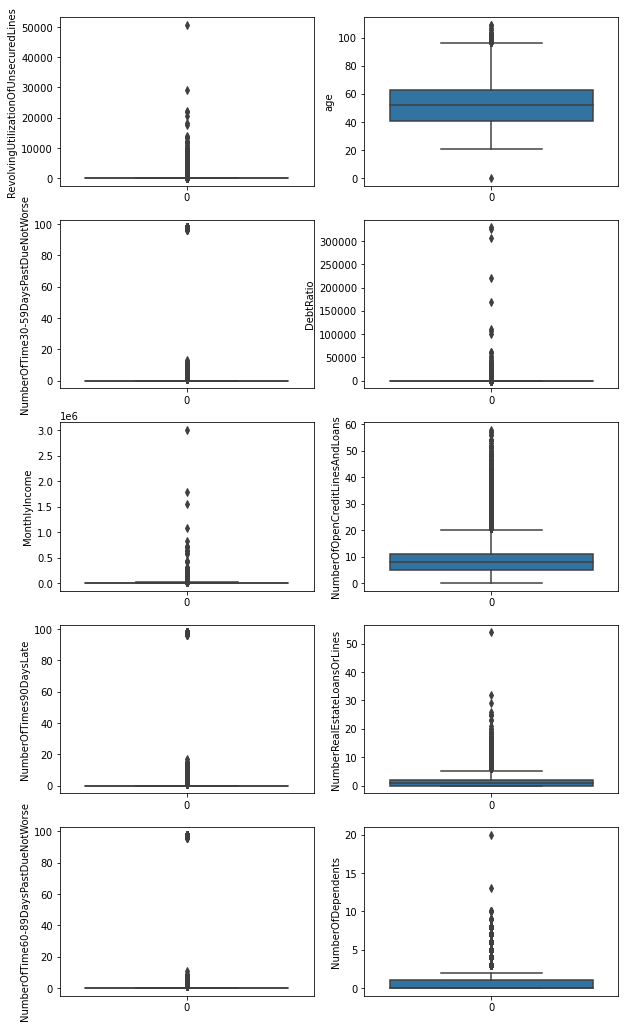

In [238]:
plt.figure(figsize=[10, 18])
i = 0
for col in train.columns:
    i = i+1
    if i<3:
        continue
    plt.subplot(5,2,i-2)
    sns.boxplot(data=train[col])
    plt.ylabel(col)

In [239]:
from scipy import stats
import numpy as np

def remove_outliers(df, feature_name, max_scale_from_std):
    f = df[feature_name]
    std = f.std()
    distance_from_mean = f - f.mean()
    condition = np.abs(distance_from_mean) >= max_scale_from_std * std
    df.loc[condition, feature_name] = f.mean()
    
    return df

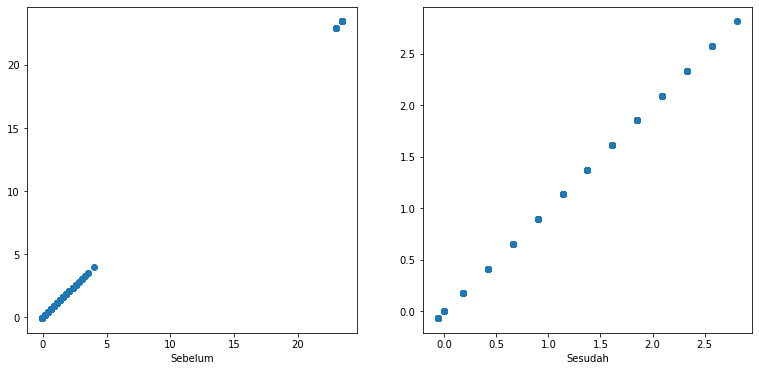

In [240]:
feature_one = X['NumberOfTimes90DaysLate']

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(feature_one, feature_one)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(X, "NumberOfTimes90DaysLate", 3)
feature_one = train_data["NumberOfTimes90DaysLate"]
axes[1].scatter(feature_one, feature_one)
axes[1].set_xlabel("Sesudah")

plt.show()

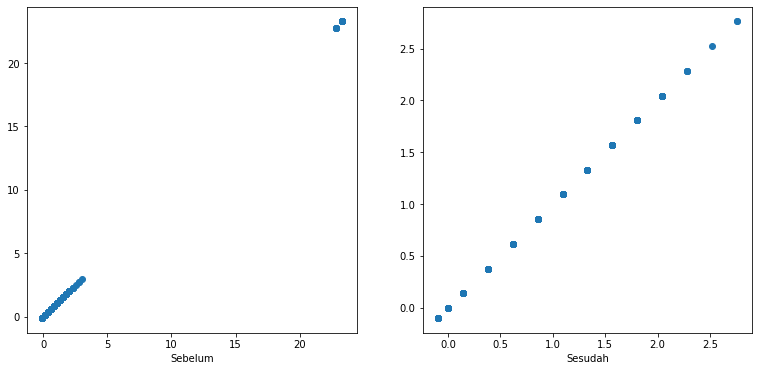

In [241]:
feature_two = X['NumberOfTime30-59DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(feature_two, feature_two)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(X, "NumberOfTime30-59DaysPastDueNotWorse", 3)
feature_two = train_data["NumberOfTime30-59DaysPastDueNotWorse"]
axes[1].scatter(feature_two, feature_two)
axes[1].set_xlabel("Sesudah")

plt.show()

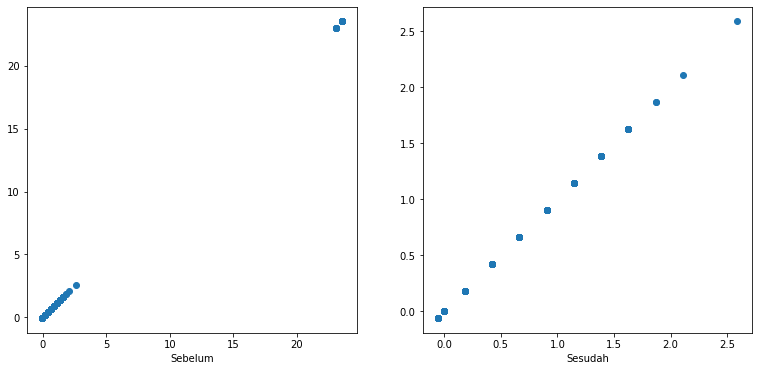

In [242]:
feature_three = X['NumberOfTime60-89DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(feature_three, feature_three)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(X, "NumberOfTime60-89DaysPastDueNotWorse", 3)
feature_three = train_data["NumberOfTime60-89DaysPastDueNotWorse"]
axes[1].scatter(feature_three, feature_three)
axes[1].set_xlabel("Sesudah")

plt.show()

array([[<AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>],
       [<AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>],
       [<AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>,
        <AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>],
       [<AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

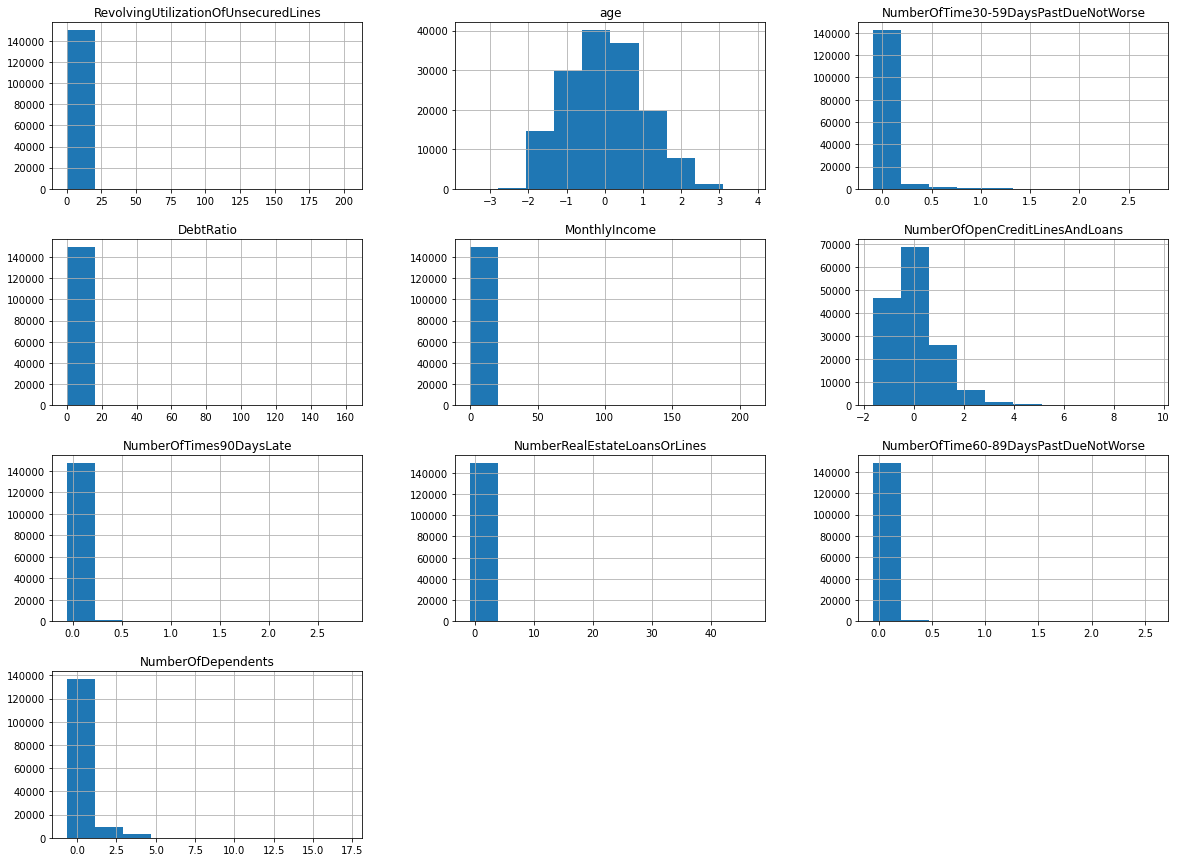

In [243]:
X.hist(figsize=(20,15))

<Figure size 432x288 with 0 Axes>

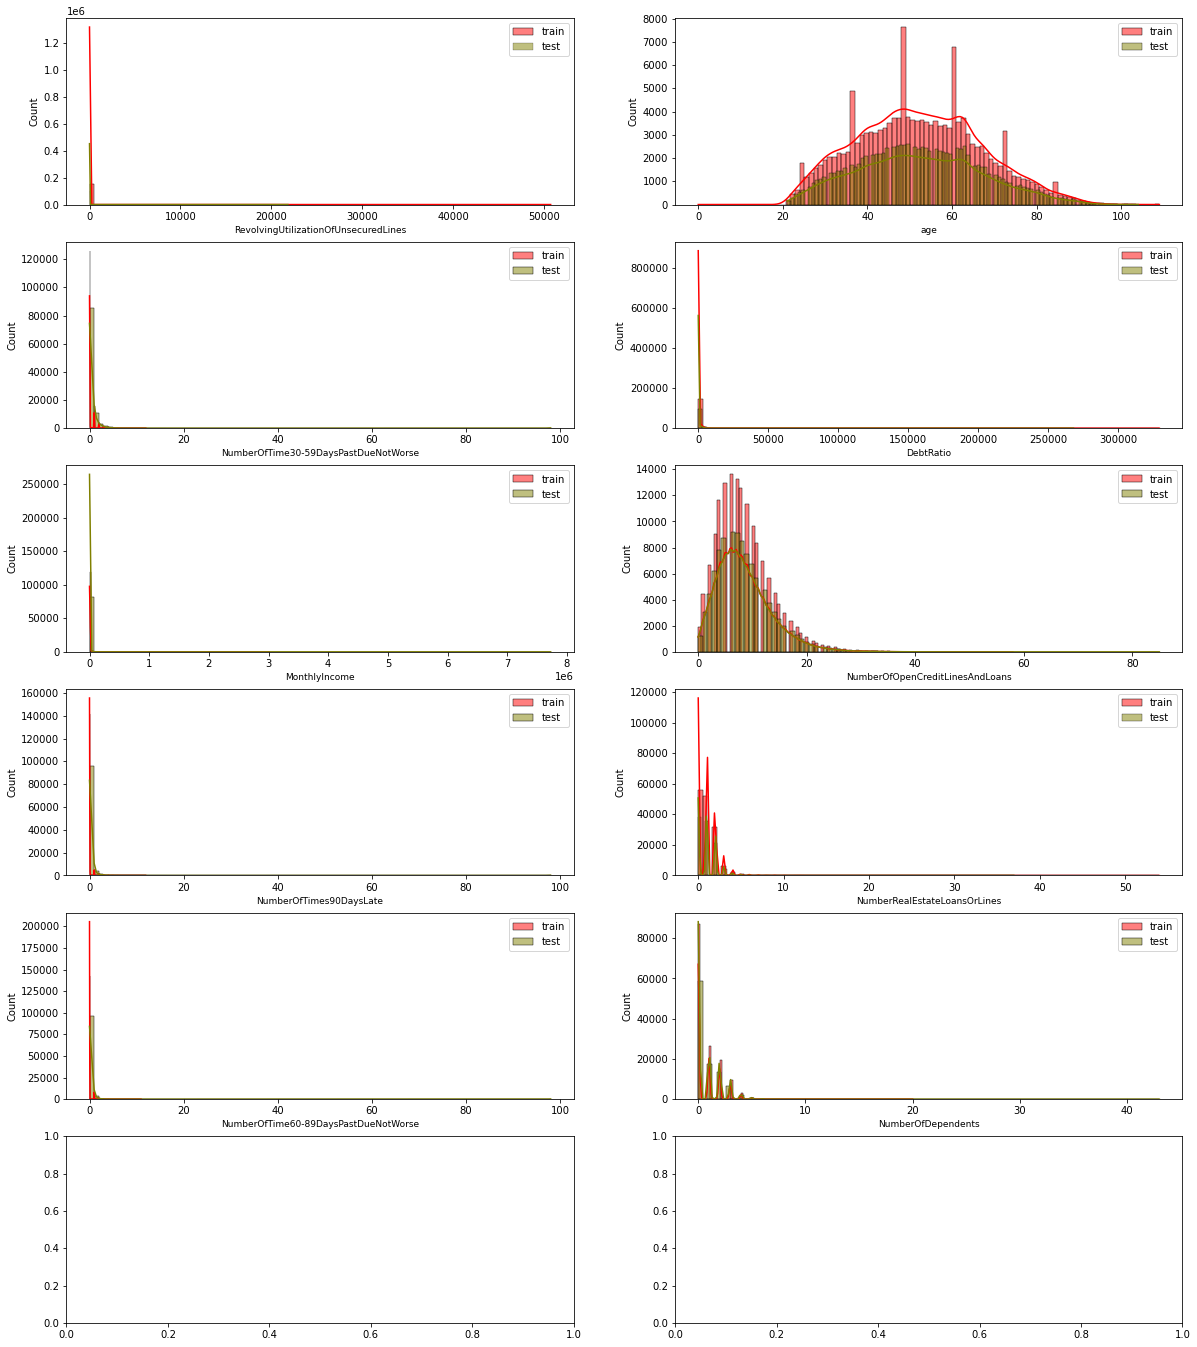

In [121]:
i = 1
plt.figure()
fig, ax = plt.subplots(6, 2,figsize=(20, 24))
for feature in X.columns:
    plt.subplot(6, 2,i)
    sns.histplot(train[feature],color="red", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

In [346]:
#Model Making

In [244]:
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor(
   
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2,4, 6),
    'n_estimators': range(60, 100, 80),
    'learning_rate': [0.1, 0.2,0.300000012]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 12,
    cv = 12,
    verbose=True
)
grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 12 folds for each of 3 candidates, totalling 36 fits


C:\Users\kalpi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [334]:
from xgboost import XGBRegressor
XGBRegressor()
model1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.17, max_delta_step=0,
             max_depth=4, min_child_weight=1, 
             monotone_constraints='()', n_estimators=60, n_jobs=10, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
model1.fit(X,y)

C:\Users\kalpi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.17, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=10, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [335]:
cv = StratifiedKFold(n_splits=12, shuffle=True, random_state=1)

In [336]:
roc_auc_scores = cross_val_score(model1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
roc_auc_scores.mean()

0.8645367453057542

In [337]:
y_predicted = model1.predict(X)
y_test_predicted = model1.predict(X_test)
roc_auc_score(y, y_predicted)

0.8715977071071628

In [338]:
model_sub = pd.DataFrame({
    'Id' : test['Id'],
    'Probability' : y_test_predicted
})

model_sub.head()

,Id,Probability
0,1,0.077695
1,2,0.039945
2,3,0.018005
3,4,0.078798
4,5,0.100010


In [339]:
model_sub.loc[model_sub['Probability']<0,'Probability']=0
model_sub.loc[model_sub['Probability']>1,'Probability']=1
model_sub.to_csv('submission_file.csv', index = False)

In [340]:
model_sub

,Id,Probability
0,1,0.077695
1,2,0.039945
2,3,0.018005
3,4,0.078798
4,5,0.100010
...,...,...
101498,101499,0.041858
101499,101500,0.357131
101500,101501,0.000000
101501,101502,0.099435


In [326]:
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor(
   
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range ( 4,8,6),
    'n_estimators': range(60, 65,50),
    'learning_rate': [0.1, 0.15,0.17]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 12,
    cv = 12,
    verbose=True
)
grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 12 folds for each of 3 candidates, totalling 36 fits


C:\Users\kalpi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)